In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from os.path import join
from glob import glob
import datetime

In [2]:
data_path = "/d1/data/FDR-Idaho_csv/"
glob(data_path + "*.csv")
#data_path = "/d1/data/FDR-Idaho/"
#glob(data_path + "*.csv")

['/d1/data/FDR-Idaho_csv/FRD_ECFlux_2015.csv',
 '/d1/data/FDR-Idaho_csv/FRD_ECFlux_2016.csv',
 '/d1/data/FDR-Idaho_csv/FRD_ECFlux_2015-2017.csv',
 '/d1/data/FDR-Idaho_csv/FRD_ECFlux_2017.csv']

In [3]:
idaho_flux_data = pd.read_csv('/d1/data/FDR-Idaho_csv/FRD_ECFlux_2015-2017.csv')
idaho_met_data = pd.read_csv('/d1/mccandle/FRD_TallTower_Met_2015-2017.csv')

In [4]:
idaho_flux_no_missing = idaho_flux_data.replace(-9999.0, np.NaN).dropna(axis=0,how='any')
print(idaho_flux_no_missing.shape)
print(idaho_flux_data.shape)
idaho_met_no_missing = idaho_met_data.replace(-999.0, np.NaN).dropna(axis=0,how='any')
print(idaho_met_no_missing.shape)
print(idaho_met_data.shape)

(42637, 11)
(52608, 11)
(295101, 44)
(315648, 44)


In [5]:
#print(idaho_flux_no_missing['h2o_flux'].min())

In [6]:
for col in idaho_flux_data.columns:
    print(col)
    
    
print(idaho_flux_data['date'][2])
print(idaho_flux_data['time'][2])

date
time
DOY
daytime
Tau
H
LE
co2_flux
h2o_flux
air_density
air_heat_capacity
1/1/2015
1:30


In [7]:
for col in idaho_met_data.columns:
    print(col)

Year
Month
Day
Hour
Minute
2m Wind Speed m/s
2m Wind Gust m/s
2m Wind Dir deg
2m Sigma Theta deg
10m Wind Speed m/s
10m Wind Gust m/s
10m Wind Dir deg
10m Sigma Theta deg
15m Wind Speed m/s
15m Wind Gust m/s
15m Wind Dir deg
15m Sigma Theta deg
45m Wind Speed m/s
45m Wind Gust m/s
45m Wind Dir deg
45m Sigma Theta deg
Top Wind Speed m/s
Top Wind Gust m/s
Top Wind Dir deg
Top Sigma Theta deg
2m Temp C
10m Temp C
15m Temp C
45m Temp C
Top Temp C
2m RH %
Solar Rad w/m^2
BP inches Hg
Rain inches
5cm Water Content
10cm Water Content
20cm Water Content
50cm Water Content
100cm Water Content
5cm Soil Temp C
10cm Soil Temp C
20cm Soil Temp C
50cm Soil Temp C
100cm Soil Temp C


In [8]:
idaho_met_no_missing['Year'].astype(int)
idaho_met_no_missing['Month'].astype(int)
idaho_met_no_missing['Day'].astype(int)
idaho_met_no_missing['Hour'].astype(int)
idaho_met_no_missing['Minute'].astype(int)

year = idaho_met_no_missing.iloc[1:,0]
month = idaho_met_no_missing.iloc[1:,1]
day = idaho_met_no_missing.iloc[1:,2]
hour = idaho_met_no_missing.iloc[1:,3]
minute = idaho_met_no_missing.iloc[1:,4]

#idaho_met_no_missing['date'] = pd.to_datetime((idaho_met_no_missing.Year*10000+idaho_met_no_missing.Month*100+idaho_met_no_missing.Day).apply(str),format='%Y%M%d')
#print(idaho_met_no_missing['date'][1:3])

idaho_met_no_missing['DateTime'] = idaho_met_no_missing[['Year', 'Month', 'Day', 'Hour','Minute']].apply(lambda s : datetime.datetime(*s),axis = 1)
print(idaho_met_no_missing['DateTime'][1:3])

idaho_flux_no_missing['DateTime'] = idaho_flux_no_missing.date.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
#idaho_flux_no_missing['DateTime3'] = idaho_flux_no_missing.time.apply(lambda y: pd.to_datetime(y).strftime('%h:m'))
#idaho_flux_no_missing['DateTime2'] = pd.to_datetime(idaho_flux_no_missing.DateTime) 
#print(idaho_flux_no_missing['DateTime3'][-5:-1])

idaho_flux_no_missing['DateTime'] = idaho_flux_no_missing['DateTime'] + ' ' + idaho_flux_no_missing['time']
#print(idaho_flux_no_missing['Test'][-5:-1])
#idaho_flux_no_missing['DateTime'] = idaho_flux_no_missing.Test.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d %H:%M:%S'))
idaho_flux_no_missing['DateTime'] = pd.to_datetime(idaho_flux_no_missing['DateTime'])
print(idaho_flux_no_missing['DateTime'][1:3])

result = pd.merge(idaho_met_no_missing,idaho_flux_no_missing,on='DateTime')
print(result)

1   2015-01-01 00:10:00
2   2015-01-01 00:15:00
Name: DateTime, dtype: datetime64[ns]
1   2015-01-01 01:00:00
2   2015-01-01 01:30:00
Name: DateTime, dtype: datetime64[ns]
       Year  Month  Day  Hour  Minute  2m Wind Speed m/s  2m Wind Gust m/s  \
0      2015      1    1     0      30                0.9               1.4   
1      2015      1    1     1       0                1.3               1.6   
2      2015      1    1     1      30                1.4               1.6   
3      2015      1    1     2       0                0.7               1.0   
4      2015      1    1     2      30                1.3               1.4   
5      2015      1    1     3       0                0.9               1.1   
6      2015      1    1     3      30                1.5               1.8   
7      2015      1    1     4       0                1.1               1.4   
8      2015      1    1     4      30                0.5               0.9   
9      2015      1    1     5       0           

In [9]:
test3 = np.array(result['air_heat_capacity'])
print(np.min(test3))

983.3962354678191


In [10]:
# Unit Conversion from C to K
def celsius_to_kelvin(temperature_c):
    return temperature_c + 273.15

# Unit Conversion from wind speed to wind components
def wind_components(wind_speed_m_s, wind_direction_degrees):
    math_dir = 270 - wind_direction_degrees
    math_dir[math_dir < 0] = 360 + math_dir[math_dir < 0]
    u = wind_speed_m_s * np.cos(np.radians(math_dir))
    v = wind_speed_m_s * np.sin(np.radians(math_dir))
    return u, v

# Unit Conversion from temperature and pressure to potential temperature
def inHg_to_hpa(pressure_inHg):
    """
    Convert pressure in inches of mercury (inHg) to pressure in hectopascals (hpa)

    Args:
        pressure_inHg: The air pressure in units inHg

    Returns:
        The air pressure in units hpa
    """
    return pressure_inHg * 33.86

def potential_temperature(temperature_k, pressure_hpa, pressure_reference_hpa=1000.0):
    """
    Convert temperature to potential temperature based on the available pressure. Potential temperature is at a
    reference pressure of 1000 mb.

    Args:
        temperature_k: The air temperature in units K
        pressure_hpa: The atmospheric pressure in units hPa
        pressure_reference_hpa: The reference atmospheric pressure for the potential temperature in hPa;
            default 1000 hPa

    Returns:
        The potential temperature in units K
    """
    return temperature_k * (pressure_reference_hpa / pressure_hpa) ** (2.0 / 7.0)

def friction_velocity(tau, density):
    """
    Compute friction velocity from tau and air density.

    Args:
        tau: The surface stress
        pressure_hpa: The atmospheric density in kg/m^3

    Returns:
        The friction velocity
    """
    u2 = np.array(result['Tau']) / np.array(result['air_density'])
    fv = np.sqrt(tau/density)
    return fv

def temperature_scale(sensible_heat_flux_W_m2, air_density_kg_m3, friction_velocity_m_s):
    """
    Caclulate the temperature turbulence scale value theta* from the sensible heat flux.

    Args:
        sensible_heat_flux_W_m2: The sensible heat flux in units W m-2.
        air_density_kg_m3: The density of air in units kg m-3.
        friction_velocity_m_s: The friction velocity in units m s-1.

    Returns:
        The temperature turbulence scale value in units K.
    """
    return -sensible_heat_flux_W_m2 / (air_density_kg_m3 * 287.0 * 7.0 / 2.0 * friction_velocity_m_s)

def virtual_temperature(temperature_k, mixing_ratio_g_kg):
    """
    Convert temperature and mixing ratio to virtual temperature.

    Args:
        temperature_k: The temperature or potential temperature in units K.
        mixing_ratio_kg_kg: The mixing ratio in units kg kg-1.

    Returns:
        The virtual temperature in units K.
    """
    return temperature_k * (1 + 0.61 * mixing_ratio_g_kg / 1000.0)

def moisture_scale(latent_heat_flux_W_m2, air_density_kg_m3, friction_velocity_m_s):
    """
    Calculate the turblulent moisture scale factor from the latent heat flux.

    Args:
        latent_heat_flux_W_m2: Latent heat flux in units W m-2
        air_density_kg_m3: Density of air in units kg m-3
        friction_velocity_m_s: The friction velocity (u*) in units m s-1

    Returns:
        The turbulent moisture scale factor in g kg-1
    """
    latent_heat_of_vaporization_J_kg = 2264705.0  # J kg-1
    return latent_heat_flux_W_m2 / (latent_heat_of_vaporization_J_kg * air_density_kg_m3 * friction_velocity_m_s) * 1000

def obukhov_length(potential_temperature_k, temperature_scale_k, friction_velocity_m_s, von_karman_constant=0.4):
    """
    Caclulates the Obukhov length, a measure of stability based on the friction velocity and temperature scale.

    Args:
        potential_temperature_k: The potential temperature in units K
        temperature_scale_k: The turbulent temperature scale (theta*) in units K
        friction_velocity_m_s: The friction velocity (u*) in units m s-1
        von_karman_constant: The von Karman constant (default=0.4)

    Returns:
        The Obukhov length in units m.
    """
    g = 9.81 # m s-2
    return friction_velocity_m_s ** 2 * potential_temperature_k / (von_karman_constant * g * temperature_scale_k)


def mixing_ratio(temp_2m_C, relative_humidity, pressure_hpa):
    """
    Calculate the mixing ratio.

    Args:
        temp_2m_C: 2-meter temperature in units of Celcius
        relative humidity: as a percentage
        pressure_hpa: atmospheric pressure in hPa

    Returns:
        The mixing ratio 
    """
    saturation_vapor_pressure= 0.6108 * np.exp(17.27 * temp_2m_C / (temp_2m_C + 237.3))
    vapor_pressure = relative_humidity / 100 * saturation_vapor_pressure 
    return 621.97 * vapor_pressure / (pressure_hpa-vapor_pressure), vapor_pressure, saturation_vapor_pressure

def bulk_richardson_number(potential_temperature_k, height,
                           mixing_ratio_g_kg, virtual_potential_skin_temperature_k, wind_speed_m_s):
    """
    Calculate the bulk Richardson number, a measure of stability.

    Args:
        potential_temperature_k: The potential or virtual potential temperature in K
        height: The height at which the potential temperature calculation is performed in m.
        mixing_ratio_kg_kg: The mixing ratio at the same height as the potential temperature in units kg kg-1.
        virtual_potential_skin_temperature_k: The virtual potential temperature at the surface
        wind_speed_m_s: The wind speed in m s-1

    Returns:

    """
    g = 9.81  # m s-2
    virtual_potential_temperature_k = virtual_temperature(potential_temperature_k, mixing_ratio_g_kg)
    return g / potential_temperature_k * height * (virtual_potential_temperature_k
                                                   - virtual_potential_skin_temperature_k) / wind_speed_m_s ** 2


# Need to convert Idaho data from celsius to kelvin
result['2m Temp K'] = celsius_to_kelvin(result['2m Temp C'])
result['10m Temp K'] = celsius_to_kelvin(result['10m Temp C'])
result['15m Temp K'] = celsius_to_kelvin(result['15m Temp C'])
result['45m Temp K'] = celsius_to_kelvin(result['45m Temp C'])

# Need to convert Idaho data to wind components from speed and direction
result['2m U-Wind m/s'],result['2m V-Wind m/s'] = wind_components(result['2m Wind Speed m/s'],result['2m Wind Dir deg'])
result['10m U-Wind m/s'],result['10m V-Wind m/s'] = wind_components(result['10m Wind Speed m/s'],result['10m Wind Dir deg'])
result['15m U-Wind m/s'],result['15m V-Wind m/s'] = wind_components(result['15m Wind Speed m/s'],result['15m Wind Dir deg'])
result['45m U-Wind m/s'],result['45m V-Wind m/s'] = wind_components(result['45m Wind Speed m/s'],result['45m Wind Dir deg'])

# Need to convert temperatures in inches of mercury to hectopascals
result['Barometric Pressure hpa'] = inHg_to_hpa(result['BP inches Hg'])  

# Need to convert from Kelvin to Potential Temperature
result['2m potential temperature k'] = potential_temperature(result['2m Temp K'],result['Barometric Pressure hpa'])    
result['10m potential temperature k'] = potential_temperature(result['10m Temp K'],result['Barometric Pressure hpa'])
result['15m potential temperature k'] = potential_temperature(result['15m Temp K'],result['Barometric Pressure hpa'])
result['45m potential temperature k'] = potential_temperature(result['45m Temp K'],result['Barometric Pressure hpa'])

# Compute the friction velocity
result['friction velocity'] = friction_velocity(result['Tau'],result['air_density'])

# Compute the temperature scale
result['temperature scale'] = temperature_scale(result['H'],result['air_density'],result['friction velocity'])

# Compute the moisture scale
result['moisture scale'] = moisture_scale(result['LE'],result['air_density'],result['friction velocity'])

# Compute the Monin Obukhov Length
result['obukhov length'] = obukhov_length(result['2m potential temperature k'], result['temperature scale'], 
                                          result['friction velocity'], von_karman_constant=0.4)

# Compute the mixing ratio
result['2m mixing ratio g_kg'], vapor_pressure, saturation_vapor_pressure = mixing_ratio(result['2m Temp C'], result['2m RH %'], result['Barometric Pressure hpa'])

# Compute the virtual potential temperature
result['2m virtual potential temperature'] = virtual_temperature(result['2m potential temperature k'], 
                                                                 result['2m mixing ratio g_kg'])
# Compute the Bulk Richardson Number
result['bulk richardson number'] = bulk_richardson_number(result['2m potential temperature k'], 2, 
                                                          result['2m mixing ratio g_kg'], 
                                                          result['2m virtual potential temperature'], 
                                                          result['2m Wind Speed m/s'])


In [12]:
# Subset into different years for training and testing
resultTest = result[(result['Year'] == 2017)]
resultTrain = result[(result['Year'] != 2017)]
print(resultTrain.shape)
print(resultTest.shape)

(25541, 56)
(15143, 56)


In [14]:
# Try computing Bulk Richardson Number between 10M and 2M
# Compute the Bulk Richardson Number
result['10m bulk richardson number'] = bulk_richardson_number(result['10m potential temperature k'], 10, 
                                                          result['2m mixing ratio g_kg'], 
                                                          result['2m virtual potential temperature'], 
                                                          result['2m Wind Speed m/s'])
# Try computing Bulk Richardson Number between 2M and 5cm soil temperature
# Compute the Bulk Richardson Number
# Compute the virtual potential temperature

result['5cm Soil Temp K'] = celsius_to_kelvin(result['5cm Soil Temp C'])
result['5cm potential temperature k'] = potential_temperature(result['5cm Soil Temp K'],result['Barometric Pressure hpa'])
result['5cm virtual potential temperature'] = virtual_temperature(result['5cm potential temperature k'], 
                                                                 result['2m mixing ratio g_kg'])
result['Soil bulk richardson number'] = bulk_richardson_number(result['2m potential temperature k'], 10, 
                                                          result['2m mixing ratio g_kg'], 
                                                          result['5cm virtual potential temperature'], 
                                                          result['2m Wind Speed m/s'])

(array([2989., 4162., 4731., 3990., 3562., 3279., 3235., 3575., 6133.,
        5028.]),
 array([ 5.27 , 14.353, 23.436, 32.519, 41.602, 50.685, 59.768, 68.851,
        77.934, 87.017, 96.1  ]),
 <a list of 10 Patch objects>)

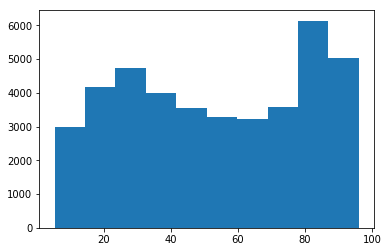

In [12]:
plt.hist(result['2m RH %'])

(array([ 214.,  501., 1686., 3943., 7474., 9100., 7894., 4994., 3625.,
        1253.]), array([255.80703427, 262.80851941, 269.81000454, 276.81148967,
        283.8129748 , 290.81445994, 297.81594507, 304.8174302 ,
        311.81891533, 318.82040047, 325.8218856 ]), <a list of 10 Patch objects>)

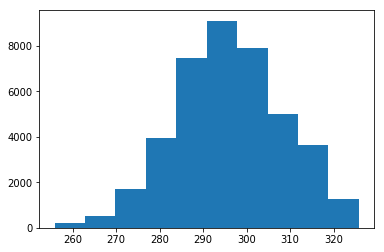

In [13]:
plt.hist(result['2m potential temperature k'])

(array([2.4230e+03, 9.0270e+03, 1.3114e+04, 8.5590e+03, 4.7490e+03,
        1.9140e+03, 6.3500e+02, 2.1400e+02, 4.0000e+01, 9.0000e+00]),
 array([0.03974489, 0.22832261, 0.41690032, 0.60547803, 0.79405575,
        0.98263346, 1.17121117, 1.35978888, 1.5483666 , 1.73694431,
        1.92552202]),
 <a list of 10 Patch objects>)

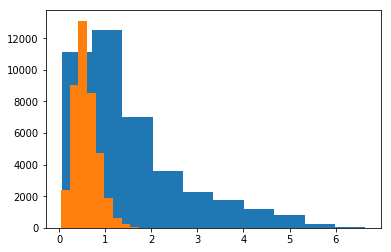

In [14]:
plt.hist(saturation_vapor_pressure)
plt.hist(vapor_pressure)


325.9374521782428
255.81157066648402
296.1770551641186
325.9374521782428
255.81157066648402
296.1770551641186
40684
40684
(40684,)


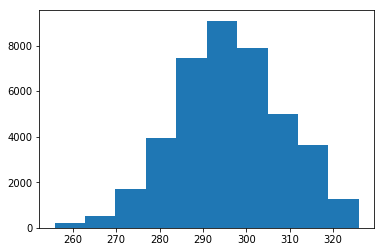

In [15]:
t = np.array(result['2m virtual potential temperature'])
print(np.max(t))
print(np.min(t))
print(np.mean(t))
result_no_missing = np.array(result['2m virtual potential temperature'].replace(-999.0, np.nan).dropna(axis=0,how='any'))
print(np.max(result_no_missing))
print(np.min(result_no_missing))
print(np.mean(result_no_missing))
plt.hist(result_no_missing)
print(np.size(t))
print(np.size(result_no_missing))
print(result['2m Wind Speed m/s'].shape)

(array([2.240e+02, 2.900e+02, 3.960e+02, 6.640e+02, 8.620e+02, 1.160e+03,
        1.399e+03, 1.799e+03, 2.185e+03, 2.508e+03, 2.805e+03, 2.555e+03,
        2.521e+03, 2.718e+03, 2.488e+03, 2.067e+03, 2.061e+03, 1.760e+03,
        1.358e+03, 1.290e+03, 1.121e+03, 1.137e+03, 9.500e+02, 8.200e+02,
        7.310e+02, 5.840e+02, 4.720e+02, 3.410e+02, 2.780e+02, 2.300e+02,
        2.120e+02, 1.360e+02, 1.250e+02, 1.010e+02, 6.700e+01, 6.600e+01,
        4.700e+01, 4.800e+01, 3.400e+01, 2.600e+01, 1.200e+01, 9.000e+00,
        1.000e+01, 6.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00]),
 array([0.02907155, 0.05671909, 0.08436662, 0.11201415, 0.13966168,
        0.16730922, 0.19495675, 0.22260428, 0.25025181, 0.27789935,
        0.30554688, 0.33319441, 0.36084194, 0.38848947, 0.41613701,
        0.44378454, 0.47143207, 0.4990796 , 0.52672714, 0.55437467,
        0.5820222 , 0.60966973, 0.63731727, 0.6649648 , 0.69261233,
        0.72025986, 0.7479074 , 0.77

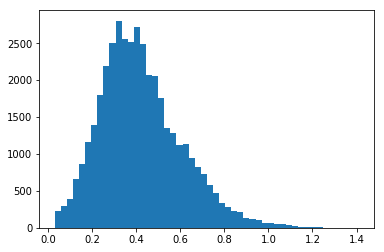

In [16]:
plt.hist(result['2m mixing ratio g_kg'],bins=50)

(array([18876., 21808.]), array([-1.,  0.,  1.]), <a list of 2 Patch objects>)

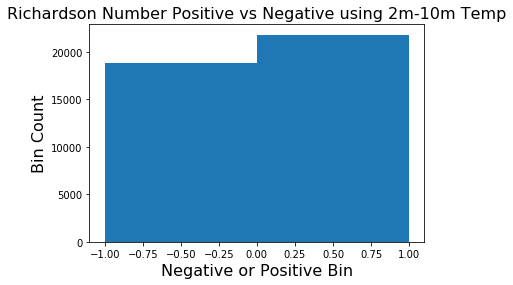

In [20]:
result['10m bulk richardson number'].drop(result['10m bulk richardson number'].idxmax())
result["BRN_sign"] = np.sign(result['10m bulk richardson number'])
plt.title('Richardson Number Positive vs Negative using 2m-10m Temp', size = 16)
plt.xlabel('Negative or Positive Bin', size = 16)
plt.ylabel('Bin Count', size = 16)
plt.hist(result["BRN_sign"],bins=2)

(array([5.1700e+02, 3.9053e+04, 7.5900e+02, 1.7000e+02, 6.6000e+01,
        3.2000e+01, 2.0000e+01, 1.8000e+01, 7.0000e+00, 7.0000e+00,
        2.0000e+00, 7.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

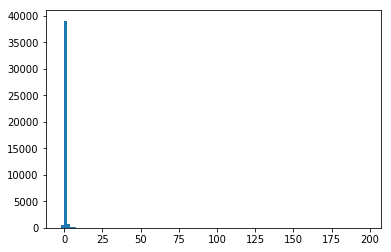

In [19]:
plt.hist(result['10m bulk richardson number'],bins=100)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.00

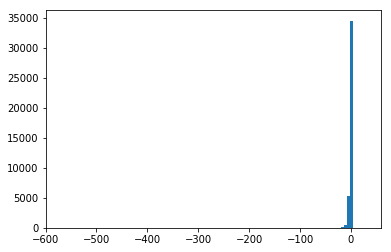

In [20]:
plt.hist(result['Soil bulk richardson number'],bins=100)

(array([31906.,  8778.]), array([-1.,  0.,  1.]), <a list of 2 Patch objects>)

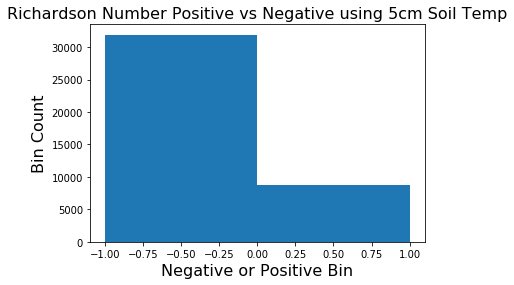

In [19]:
result['Soil bulk richardson number'].drop(result['Soil bulk richardson number'].idxmin())
result["BRN_sign_5cm"] = np.sign(result['Soil bulk richardson number'])
plt.title('Richardson Number Positive vs Negative using 5cm Soil Temp', size = 16)
plt.xlabel('Negative or Positive Bin', size = 16)
plt.ylabel('Bin Count', size = 16)
plt.hist(result["BRN_sign_5cm"],bins=2)

In [15]:
# Subset into different years for training and testing
resultTest = result[(result['Year'] == 2017)]
resultTrain = result[(result['Year'] != 2017)]
print(resultTrain.shape)
print(resultTest.shape)

(25541, 85)
(15143, 85)


In [21]:
# Imports Required for random forest
# Pandas is used for data manipulation, h5py for data (conda install h5py)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
#import pydot
import matplotlib.pyplot as plt
import datetime
import h5py
import numpy.ma as ma

dataset = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
dataset['2m potential temperature k'] = resultTrain['2m potential temperature k']
dataset['10m potential temperature k'] = resultTrain['10m potential temperature k']
dataset['15m potential temperature k'] = resultTrain['15m potential temperature k']
dataset['45m potential temperature k'] = resultTrain['45m potential temperature k']
dataset['2m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['2m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['10m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['10m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['15m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['15m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['45m U-Wind m/s'] = resultTrain['2m U-Wind m/s']
dataset['45m V-Wind m/s'] = resultTrain['2m V-Wind m/s']
dataset['2m RH %'] = resultTrain['2m RH %']
dataset['Solar Rad w/m^2'] = resultTrain['Solar Rad w/m^2']
dataset['Barometric Pressure hpa'] = resultTrain['Barometric Pressure hpa']
dataset['Rain inches'] = resultTrain['Rain inches']
dataset['5cm Water Content'] = resultTrain['5cm Water Content']
dataset['5cm Soil Temp C'] = resultTrain['5cm Soil Temp C']
dataset['air_heat_capacity'] = resultTrain['air_heat_capacity']

datasetTest = pd.DataFrame()
# Create datasets for training and testing.  
# Predictors to use:
datasetTest['2m potential temperature k'] = resultTest['2m potential temperature k']
datasetTest['10m potential temperature k'] = resultTest['10m potential temperature k']
datasetTest['15m potential temperature k'] = resultTest['15m potential temperature k']
datasetTest['45m potential temperature k'] = resultTest['45m potential temperature k']
datasetTest['2m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['2m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['10m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['10m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['15m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['15m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['45m U-Wind m/s'] = resultTest['2m U-Wind m/s']
datasetTest['45m V-Wind m/s'] = resultTest['2m V-Wind m/s']
datasetTest['2m RH %'] = resultTest['2m RH %']
datasetTest['Solar Rad w/m^2'] = resultTest['Solar Rad w/m^2']
datasetTest['Barometric Pressure hpa'] = resultTest['Barometric Pressure hpa']
datasetTest['Rain inches'] = resultTest['Rain inches']
datasetTest['5cm Water Content'] = resultTest['5cm Water Content']
datasetTest['5cm Soil Temp C'] = resultTest['5cm Soil Temp C']
datasetTest['air_heat_capacity'] = resultTest['air_heat_capacity']
#dataset['air_density'] = result['air_density']
#dataset['Tau'] = result['Tau']
featuresM = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','Rain inches','5cm Water Content','5cm Soil Temp C',
             'air_heat_capacity']
featuresB = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','Rain inches','5cm Water Content','5cm Soil Temp C',
             'air_heat_capacity']
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','Rain inches','5cm Water Content','5cm Soil Temp C',
             'air_heat_capacity']

MoistureScaleTrain = resultTrain['moisture scale']
TemperatureScaleTrain = resultTrain['temperature scale']
FrictionVelocityTrain = resultTrain['friction velocity']

MoistureScaleTest = resultTest['moisture scale']
TemperatureScaleTest = resultTest['temperature scale']
FrictionVelocityTest = resultTest['friction velocity']

# Random forest method
# Split the data into training and testing sets
train_featuresM, test_featuresM, train_labelsM, test_labelsM = train_test_split(dataset, MoistureScaleTrain, test_size = 0.00, random_state = 42)
train_featuresF, test_featuresF, train_labelsF, test_labelsF = train_test_split(dataset, FrictionVelocityTrain, test_size = 0.00, random_state = 42)
train_featuresT, test_featuresT, train_labelsT, test_labelsT = train_test_split(dataset, TemperatureScaleTrain, test_size = 0.00, random_state = 42)

# Split the data into training and testing sets
train_featuresMT, test_featuresMT, train_labelsMT, test_labelsMT = train_test_split(datasetTest, MoistureScaleTest, test_size = 0.00, random_state = 42)
train_featuresFT, test_featuresFT, train_labelsFT, test_labelsFT = train_test_split(datasetTest, FrictionVelocityTest, test_size = 0.00, random_state = 42)
train_featuresTT, test_featuresTT, train_labelsTT, test_labelsTT = train_test_split(datasetTest, TemperatureScaleTest, test_size = 0.00, random_state = 42)

In [24]:
print(train_featuresM.shape)
print(train_featuresMT.shape)

(25541, 19)
(15143, 19)


In [22]:
######### Configure and train the Random Forest ##############
# Import the Random Forest Model
# Instantiate model 
rfM = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfT = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
rfF = RandomForestRegressor(n_estimators= 1000, random_state=2,criterion='mse',min_samples_split=4,min_samples_leaf=2)
# Train the model on training data
rfM.fit(train_featuresM, train_labelsM);
rfF.fit(train_featuresF, train_labelsF);
rfT.fit(train_featuresT, train_labelsT);

In [23]:
# Use the forest's predict method on the test data
predictionsM = rfM.predict(train_featuresMT)
predictionsT = rfT.predict(train_featuresTT)
predictionsF = rfF.predict(train_featuresFT)

######### Compute Errors on Test Data #############
# Calculate the absolute errors
errorsM = abs(predictionsM - train_labelsMT)
errorsT = abs(predictionsT - train_labelsTT)
errorsF = abs(predictionsF - train_labelsFT)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for predicting Moisture Scale:', round(np.mean(errorsM), 4))
print('Mean Absolute Error for predicting Temperature Scale:', round(np.mean(errorsT), 4))
print('Mean Absolute Error for predicting Friction Velocity:', round(np.mean(errorsF), 4))
print('Moisture Scale Mean: ',np.mean(MoistureScaleTest))
print('Moisture Scale Standard Deviation: ',np.std(MoistureScaleTest))
print('Temperature Scale Mean: ',np.mean(TemperatureScaleTest))
print('Temperature Scale Standard Deviation: ',np.std(TemperatureScaleTest))
print('Friction Velocity Mean: ',np.mean(FrictionVelocityTest))
print('Friction Velocity Standard Deviation: ',np.std(FrictionVelocityTest))

Mean Absolute Error for predicting Moisture Scale: 0.017
Mean Absolute Error for predicting Temperature Scale: 0.0832
Mean Absolute Error for predicting Friction Velocity: 0.0594
Moisture Scale Mean:  0.027508112410258197
Moisture Scale Standard Deviation:  0.06247461810922704
Temperature Scale Mean:  -0.10894228532243955
Temperature Scale Standard Deviation:  0.31209201287859567
Friction Velocity Mean:  0.2737718332543237
Friction Velocity Standard Deviation:  0.20352365418080426


In [25]:
# Feature selection
importancesM = list(rfM.feature_importances_)
feature_listM = featuresM
feature_importancesM = [(featuresM,round(importancesM,2)) for featuresM, importancesM in zip(feature_listM,importancesM)]
feature_importancesM = sorted(feature_importancesM,key = lambda x: x[1],reverse=True)
print("Features importances for predicting moisture scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesM];

# Feature selection
importancesT = list(rfT.feature_importances_)
feature_listT = featuresB
feature_importancesT = [(featuresT,round(importancesT,2)) for featuresT, importancesT in zip(feature_listT,importancesT)]
feature_importancesT = sorted(feature_importancesT,key = lambda x: x[1],reverse=True)
print("Features importances for predicting temperature scale")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesT];

# Feature selection
importancesF = list(rfF.feature_importances_)
featuresF = ['2m potential temperature k','10m potential temperature k','15m potential temperature k',
             '45m potential temperature k','2m U-Wind m/s','2m V-Wind m/s','10m U-Wind m/s','10m V-Wind m/s',
            '15m U-Wind m/s','15m V-Wind m/s','45m U-Wind m/s','45m V-Wind m/s','2m RH %','Solar Rad w/m^2',
             'Barometric Pressure hpa','Rain inches','5cm Water Content','5cm Soil Temp C',
             'air_heat_capacity']
feature_listF = featuresF
feature_importancesF = [(featuresF,round(importancesF,2)) for featuresF, importancesF in zip(feature_listF,importancesF)]
feature_importancesF = sorted(feature_importancesF,key = lambda x: x[1],reverse=True)
print("Features importances for predicting friction velocity")
[print('Variable:{:20} Importance: {}'.format(*pair)) for pair in feature_importancesF];

Features importances for predicting moisture scale
Variable:Solar Rad w/m^2      Importance: 0.35
Variable:air_heat_capacity    Importance: 0.17
Variable:5cm Water Content    Importance: 0.15
Variable:2m RH %              Importance: 0.05
Variable:Barometric Pressure hpa Importance: 0.05
Variable:5cm Soil Temp C      Importance: 0.05
Variable:2m potential temperature k Importance: 0.02
Variable:45m potential temperature k Importance: 0.02
Variable:2m V-Wind m/s        Importance: 0.02
Variable:10m V-Wind m/s       Importance: 0.02
Variable:15m V-Wind m/s       Importance: 0.02
Variable:45m V-Wind m/s       Importance: 0.02
Variable:10m potential temperature k Importance: 0.01
Variable:15m potential temperature k Importance: 0.01
Variable:2m U-Wind m/s        Importance: 0.01
Variable:10m U-Wind m/s       Importance: 0.01
Variable:15m U-Wind m/s       Importance: 0.01
Variable:45m U-Wind m/s       Importance: 0.01
Variable:Rain inches          Importance: 0.0
Features importances for pr

The R value is... 0.9127098813957891


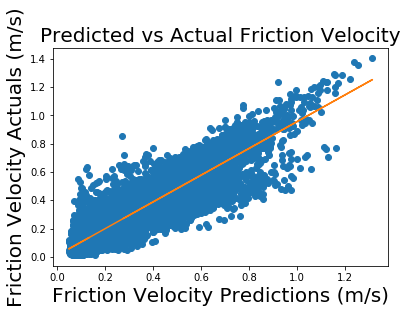

In [27]:
## Plots below after flux and met data are joined together...

from scipy import stats

#errorsM = abs(predictionsM - test_labelsM)
#errorsT = abs(predictionsT - test_labelsT)

x = predictionsF
y = train_labelsFT
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Predicted vs Actual Friction Velocity', size = 20)
plt.xlabel('Friction Velocity Predictions (m/s)', size = 20)
plt.ylabel('Friction Velocity Actuals (m/s)', size = 20)

plt.plot(x,y,'o', x, line)
plt.show()

The R value is... 0.7914600120772693


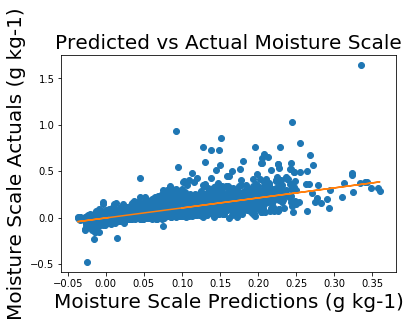

In [28]:
## Plots below after flux and met data are joined together...

from scipy import stats

#errorsM = abs(predictionsM - test_labelsM)
#errorsT = abs(predictionsT - test_labelsT)

x = predictionsM
y = train_labelsMT
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Predicted vs Actual Moisture Scale', size = 20)
plt.xlabel('Moisture Scale Predictions (g kg-1)', size = 20)
plt.ylabel('Moisture Scale Actuals (g kg-1)', size = 20)

plt.plot(x,y,'o', x, line)
plt.show()

The R value is... 0.8856077517163402


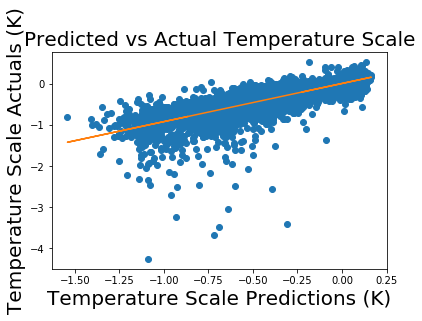

In [30]:
## Plots below after flux and met data are joined together...

from scipy import stats

#errorsM = abs(predictionsM - test_labelsM)
#errorsT = abs(predictionsT - test_labelsT)

x = predictionsT
y = train_labelsTT
plt.scatter(x, y, 1, "k")
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
print("The R value is...",r_value)
plt.title('Predicted vs Actual Temperature Scale', size = 20)
plt.xlabel('Temperature Scale Predictions (K)', size = 20)
plt.ylabel('Temperature Scale Actuals (K)', size = 20)

plt.plot(x,y,'o', x, line)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,2):
    
    # Set up the plot
    ax = plt.subplot(1, 1, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_flux_no_missing['h2o_flux'],bins=50)
        ax.set_title('h2o_flux', size = 10)
        
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,7):
    
    # Set up the plot
    ax = plt.subplot(4, 2, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_flux_no_missing['Tau'],bins=50)
        ax.set_title('Tau', size = 10)
    elif i == 2:
        ax.hist(idaho_flux_no_missing['H'],bins=50)
        ax.set_title('Sensible Heat Flux', size = 10)
    elif i == 3:
        ax.hist(idaho_flux_no_missing['LE'],bins=50)
        ax.set_title('Latent Heat Flux', size = 10)
    elif i == 4:
        ax.hist(idaho_flux_no_missing['co2_flux'],bins=50)
        ax.set_title('CO2 Flux', size = 10)
    elif i == 5:
        ax.hist(idaho_flux_no_missing['air_heat_capacity'],bins=50)
        ax.set_title('Heat Capacity of Air', size = 10)
    elif i == 6:
        ax.hist(idaho_flux_no_missing['air_density'],bins=50)
        ax.set_title('Air Density', size = 10)
#    elif i == 7:
#        ax.hist(idaho_flux_no_missing['h2o_flux'],bins=50)
#        ax.set_title('h2o_flux', size = 10)

    
    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#    ax.set_xlabel('Delay (min)', size = 22)
#    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,9):
    
    # Set up the plot
    ax = plt.subplot(4, 2, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_met_no_missing['2m Wind Speed m/s'],bins=50)
        ax.set_title('2m Wind Speed m/s', size = 10)
    elif i == 2:
        ax.hist(idaho_met_no_missing['2m Wind Gust m/s'],bins=50)
        ax.set_title('2m Wind Gust m/s', size = 10)
    elif i == 3:
        ax.hist(idaho_met_no_missing['10m Wind Speed m/s'],bins=50)
        ax.set_title('10m Wind Speed m/s', size = 10)
    elif i == 4:
        ax.hist(idaho_met_no_missing['10m Wind Gust m/s'],bins=50)
        ax.set_title('10m Wind Gust m/s', size = 10)
    elif i == 5:
        ax.hist(idaho_met_no_missing['15m Wind Speed m/s'],bins=50)
        ax.set_title('15m Wind Speed m/s', size = 10)
    elif i == 6:
        ax.hist(idaho_met_no_missing['15m Wind Gust m/s'],bins=50)
        ax.set_title('15m Wind Gust m/s', size = 10)
    elif i == 7:
        ax.hist(idaho_met_no_missing['45m Wind Speed m/s'],bins=50)
        ax.set_title('45m Wind Speed m/s', size = 10)
    elif i == 8:
        ax.hist(idaho_met_no_missing['45m Wind Gust m/s'],bins=50)
        ax.set_title('45m Wind Gust m/s', size = 10)
    
    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#    ax.set_xlabel('Delay (min)', size = 22)
#    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,9):
    
    # Set up the plot
    ax = plt.subplot(4, 2, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_met_no_missing['2m Wind Dir deg'],bins=50)
        ax.set_title('2m Wind Dir deg', size = 10)
    elif i == 2:
        ax.hist(idaho_met_no_missing['2m Sigma Theta deg'],bins=50)
        ax.set_title('2m Sigma Theta deg', size = 10)
    elif i == 3:
        ax.hist(idaho_met_no_missing['10m Wind Dir deg'],bins=50)
        ax.set_title('10m Wind Dir deg', size = 10)
    elif i == 4:
        ax.hist(idaho_met_no_missing['10m Sigma Theta deg'],bins=50)
        ax.set_title('10m Sigma Theta deg', size = 10)
    elif i == 5:
        ax.hist(idaho_met_no_missing['15m Wind Dir deg'],bins=50)
        ax.set_title('15m Wind Dir deg', size = 10)
    elif i == 6:
        ax.hist(idaho_met_no_missing['15m Sigma Theta deg'],bins=50)
        ax.set_title('15m Sigma Theta deg', size = 10)
    elif i == 7:
        ax.hist(idaho_met_no_missing['45m Wind Dir deg'],bins=50)
        ax.set_title('45m Wind Dir deg', size = 10)
    elif i == 8:
        ax.hist(idaho_met_no_missing['45m Sigma Theta deg'],bins=50)
        ax.set_title('45m Sigma Theta deg', size = 10)
    
    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#    ax.set_xlabel('Delay (min)', size = 22)
#    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,5):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_met_no_missing['2m Temp C'],bins=50)
        ax.set_title('2m Temp C', size = 10)
    elif i == 2:
        ax.hist(idaho_met_no_missing['10m Temp C'],bins=50)
        ax.set_title('10m Temp C', size = 10)
    elif i == 3:
        ax.hist(idaho_met_no_missing['15m Temp C'],bins=50)
        ax.set_title('15m Temp C', size = 10)
    elif i == 4:
        ax.hist(idaho_met_no_missing['45m Temp C'],bins=50)
        ax.set_title('45m Temp C', size = 10)
    
    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#    ax.set_xlabel('Delay (min)', size = 22)
#    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,6):
    
    # Set up the plot
    ax = plt.subplot(3, 2, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_met_no_missing['5cm Water Content'],bins=50)
        ax.set_title('5cm Water Content', size = 10)
    elif i == 2:
        ax.hist(idaho_met_no_missing['10cm Water Content'],bins=50)
        ax.set_title('10cm Water Content', size = 10)
    elif i == 3:
        ax.hist(idaho_met_no_missing['20cm Water Content'],bins=50)
        ax.set_title('20cm Water Content', size = 10)
    elif i == 4:
        ax.hist(idaho_met_no_missing['50cm Water Content'],bins=50)
        ax.set_title('50cm Water Content', size = 10)
    elif i == 5:
        ax.hist(idaho_met_no_missing['100cm Water Content'],bins=50)
        ax.set_title('100cm Water Content', size = 10)

    
    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#    ax.set_xlabel('Delay (min)', size = 22)
#    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
for i in range(1,5):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i)
    
    # Draw the plot
    if i == 1:
        ax.hist(idaho_met_no_missing['2m RH %'],bins=50)
        ax.set_title('2m RH %', size = 10)
    elif i == 2:
        ax.hist(idaho_met_no_missing['Solar Rad w/m^2'],bins=50)
        ax.set_title('Solar Rad w/m^2', size = 10)
    elif i == 3:
        ax.hist(idaho_met_no_missing['BP inches Hg'],bins=50)
        ax.set_title('BP inches Hg', size = 10)
    elif i == 4:
        ax.hist(idaho_met_no_missing['Rain inches'],bins=50)
        ax.set_title('Rain inches', size = 10)

    
    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
#    ax.set_xlabel('Delay (min)', size = 22)
#    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()